In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
from source.datasets import CatBallDataset, AnalogBits, custom_collate_with_info
import numpy as np
import jlc
import torch


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%load_ext autoreload
%autoreload 2
import sys, os
sys.path.append('./source/')
from source.utils import write_args, model_and_diffusion_defaults, SmartParser
from argparse import Namespace
args = SmartParser().get_args(do_parse_args=False)
print(args)
#write_args(args, "./saves/test/args.json")
args.ema_rate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Namespace(attention_resolutions='-2,-1', bce_loss=False, betas='0.9,0.999', cat_ball_data=False, clip_denoised=True, conditioning_type='none', datasets='non-medical', datasets_as_classes=False, deeper_net=True, dropout=0.0, ema_rate='0.9999', eval_batch_size=0, eval_ema_step=50000, eval_guidance_weight=0.0, eval_interval=5000, eval_num_steps=100, fp16_scale_growth=0.001, gamma_clip_min=1e-09, image_size=32, input_scale=1.0, log_train_metrics='loss', log_vali_interval=200, logs_folder='../logs2/', loss_weights='uniform', lr=0.0001, lr_decay_steps=0, lr_decay_type='linear', lr_warmup_steps=0, lr_warmup_type='linear', major_vote_number=5, max_iter=100000, max_num_classes=8, min_label_size=0.01, model_name='test', model_str='model*', no_diffusion=False, no_image_prob=0.1, no_label_prob=0.1, noise_schedule='linear', num_channels=64, num_classes=0, num_heads=4, num_heads_upsample=-1, num_res_blocks=3, num

'0.9999'

In [10]:
%matplotlib inline

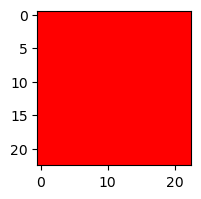

In [55]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from PIL import Image
from tempfile import NamedTemporaryFile
import cv2
import warnings

def render_axis_ticks(image_width=1000,
                      num_uniform_spaced=None,
                      bg_color="white",
                      xtick_kwargs={"labels": np.arange(5)},
                      tick_params={}):
    old_backend = matplotlib.rcParams['backend']
    old_dpi = matplotlib.rcParams['figure.dpi']
    dpi = 100
    if num_uniform_spaced is None:
        num_uniform_spaced = len(xtick_kwargs["labels"])
    n = num_uniform_spaced
     
    matplotlib.rcParams['figure.dpi'] = dpi
    matplotlib.use('Agg')
    try:        
        fig = plt.figure(figsize=(image_width/dpi, 1e-15), facecolor=bg_color)
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_facecolor(bg_color)
        ax.set_frame_on(False)
        ax.tick_params(**tick_params)
        fig.add_axes(ax)
        
        plt.yticks([])
        plt.xlim(0, n)
        x_pos = np.linspace(0.5,n-0.5,n)
        if not "ticks" in xtick_kwargs:
            xtick_kwargs["ticks"] = x_pos[:len(xtick_kwargs["labels"])]
        else:
            if xtick_kwargs["ticks"] is None:
                xtick_kwargs["ticks"] = x_pos[:len(xtick_kwargs["labels"])]
        plt.xticks(**xtick_kwargs)
        
        
        warnings.filterwarnings("ignore") #avoid warning about agg backend not showing anything
        fig.show()
        warnings.resetwarnings()

        with NamedTemporaryFile(suffix=".png", delete=False) as temp_file:
            temp_filename = temp_file.name
            fig.savefig(temp_filename, format='png', bbox_inches='tight', pad_inches=0)
        im = np.array(Image.open(temp_filename))
        if not im.shape[1]==image_width:
            #reshape with cv2 linear interpolation
            warnings.warn("Image width is not as expected, likely due to too large text labels. Reshaping with cv2 linear interpolation.")
            im = cv2.resize(im, (image_width, im.shape[0]), interpolation=cv2.INTER_LINEAR)

        matplotlib.use(old_backend)
        matplotlib.rcParams['figure.dpi'] = old_dpi
    except:
        matplotlib.use(old_backend)
        matplotlib.rcParams['figure.dpi'] = old_dpi
        raise
    return im

#test for empty image without ticks
im = render_axis_ticks(23,bg_color="red",xtick_kwargs={"labels": ["  "]}, tick_params={"bottom": False})
plt.figure(figsize=(20,2))
plt.imshow(im)

In [8]:


im = render_axis_ticks(bg_color="white",xtick_kwargs={"labels":["1","tgwo","three","four","five"], "fontsize":20})
print(im.shape)
plt.figure(figsize=(15,2))
plt.imshow(im)

(37, 1000, 4)


In [3]:
%matplotlib qt
import jlc

plt.figure(figsize=(15,2))
plt.imshow(im)
jlc.zoom()
